In [3]:
from draw3d import *
from draw2d import *
from colors import *
from vectors import *

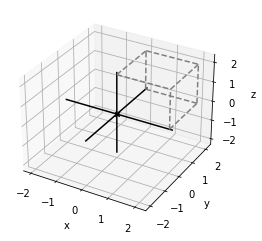

In [4]:
draw3d(Box3D(2,2,2))

In [6]:
draw3d(Arrow3D((2,2,2),color=red))

AttributeError: 'FancyArrow3D' object has no attribute 'do_3d_projection'

<Figure size 432x288 with 1 Axes>

In [7]:
dot((3,4),(2,3))

18

In [8]:
dot((3,4),(3,4))

25

In [9]:
dot((1,2,2),(2,2,1))

8

In [28]:
from math import degrees


degrees(angle_between((2,0,0),(2,0,2)))

45.00000000000001

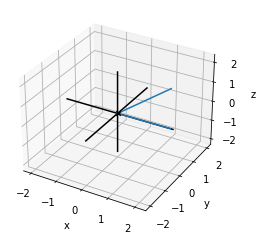

In [29]:
draw3d(Segment3D((0,0,0), (2,0,0)),
       Segment3D((0,0,0), (2,0,2)))

In [31]:
cross((1,0,1),(-1,0,0))

(0, -1, 0)

In [32]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [33]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [34]:
def component(v,direction):
    return (dot(v,direction) / length(direction))

In [35]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [36]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [37]:
blues = matplotlib.cm.get_cmap('Blues')

In [38]:
def unit(v):
    return scale(1./length(v), v)

In [39]:
def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [40]:
from vectors import *
from draw2d import *

In [41]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) #1
        if unit_normal[2] > 0: #2
            c = color_map(1 - dot(unit(normal(face)), unit(light))) #3
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines) #4
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

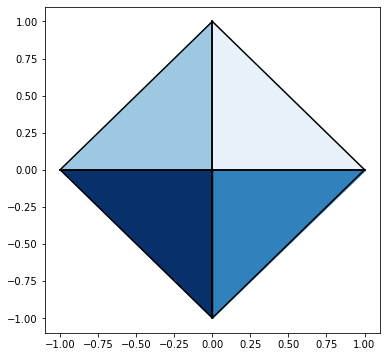

In [42]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)